In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Задача 1

Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы


### Задача 1.1
Скачать данные по ссылке https://gbcdn.mrgcdn.ru/uploads/asset/5298945/attachment/0bff2e29897ee28a9e482ff8499da7de.csv

In [93]:
df = pd.read_csv('./kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


### Задача 1.2

Изучите стоимости недвижимости

In [94]:
pd.set_option('display.float_format', '{:,.2f}'.format)
df['price'].agg(['min','mean','max'])

min       75,000.00
mean     540,088.14
max    7,700,000.00
Name: price, dtype: float64

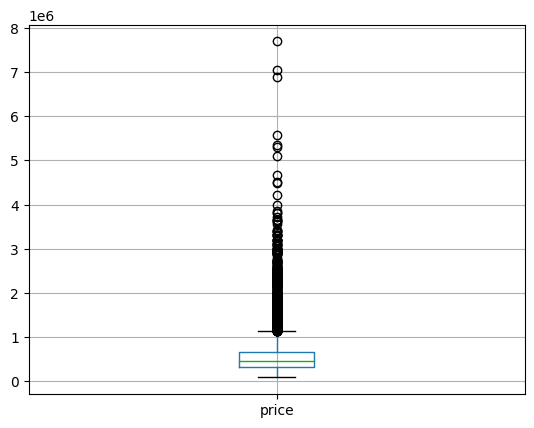

In [95]:
df.boxplot(column='price')
plt.show()

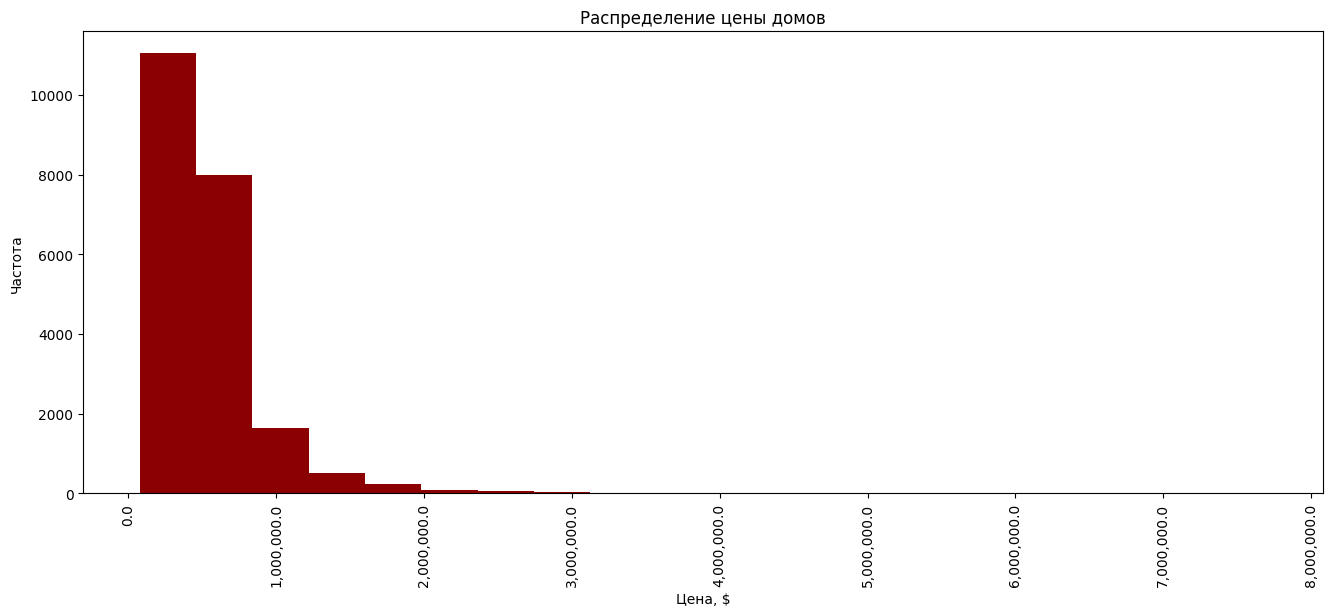

In [96]:
plt.figure(figsize=(16, 6))

plt.hist(df['price'], bins=20, color='darkred')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,}'.format(x)))
plt.xticks(rotation=90)

plt.xlabel('Цена, $')
plt.ylabel('Частота')
plt.title('Распределение цены домов')


plt.show();

Получается очень не информативно, интересно посмотреть более подробно

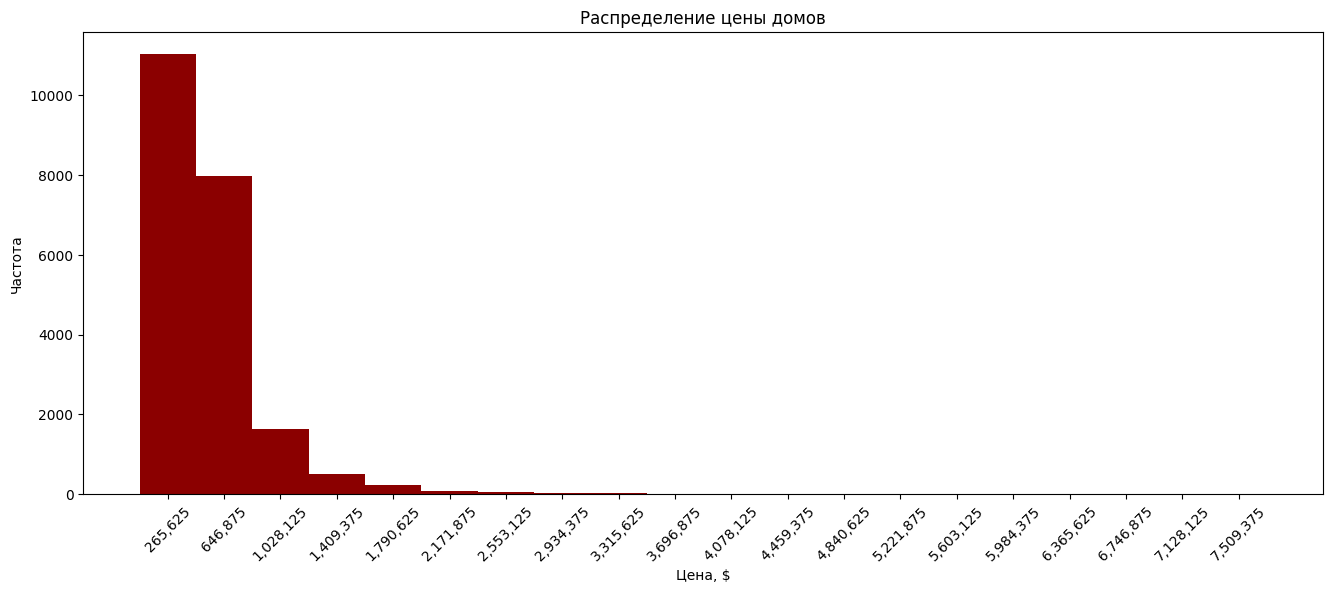

In [126]:
plt.figure(figsize=(16, 6))

n, bins, p = plt.hist(df['price'], bins=20, color='darkred')
# plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,}'.format(x)))
# print(n, bins, p)

bin_centers = (bins[:-1] + bins[1:]) / 2

plt.xticks(ticks=bin_centers, labels=[f"{int(x):,}" for x in bin_centers], rotation=45)

plt.xlabel('Цена, $')
plt.ylabel('Частота')
plt.title('Распределение цены домов')

plt.show()

Изучим область с наибольшей частотой ограничив минимальное количество цен за дом частотой 10

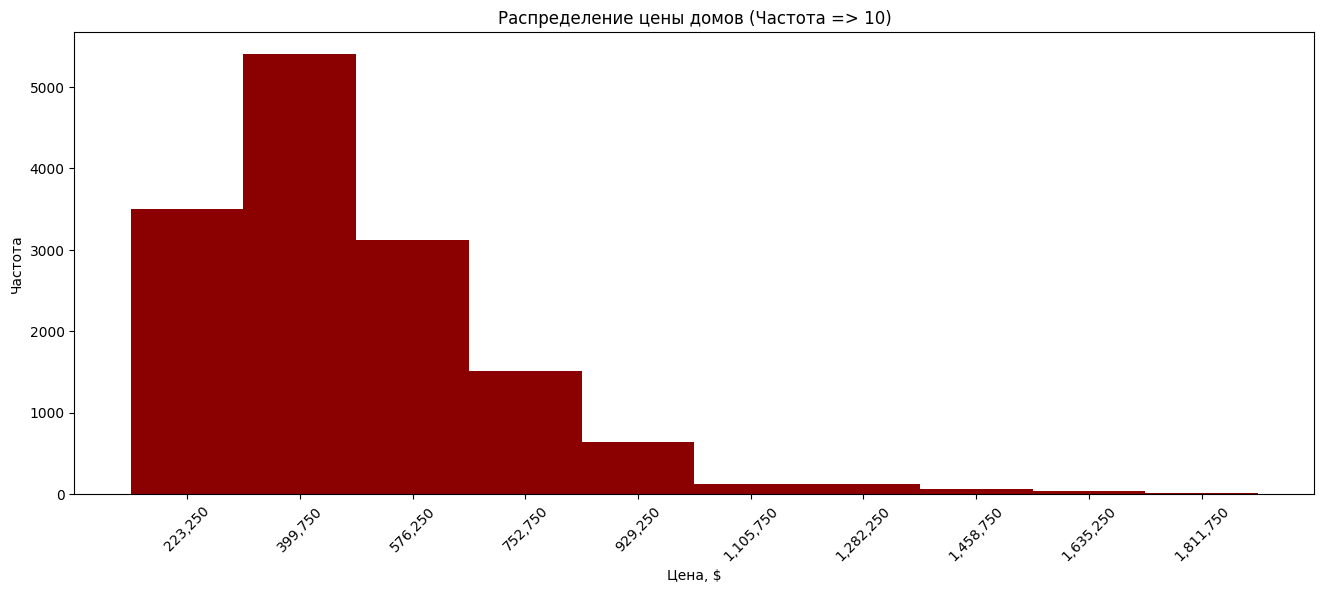

In [98]:
plt.figure(figsize=(16, 6))

value_counts = df['price'].value_counts()
fdf = df[df['price'].isin(value_counts[value_counts >= 10].index)]['price']
n, bins, _ = plt.hist(fdf, bins=10, color='darkred')

bin_centers = (bins[:-1] + bins[1:]) / 2

plt.xticks(ticks=bin_centers, labels=[f"{int(x):,}" for x in bin_centers], rotation=45)

plt.xlabel('Цена, $')
plt.ylabel('Частота')
plt.title('Распределение цены домов (Частота => 10)')

plt.show();


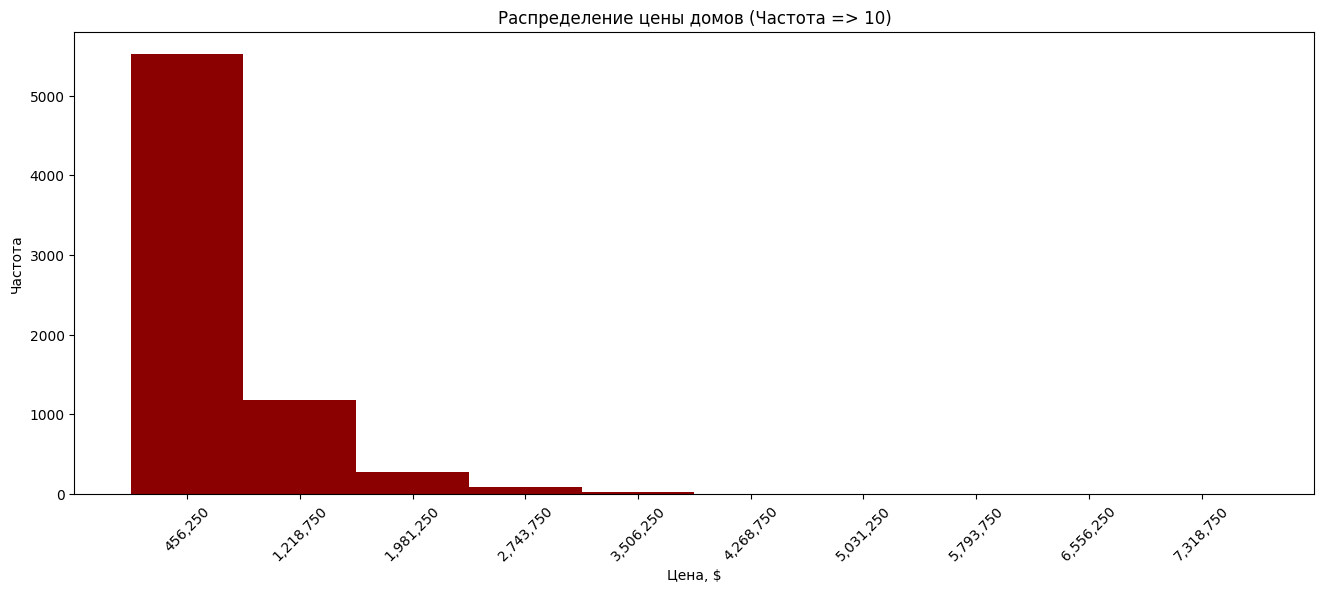

In [103]:
plt.figure(figsize=(16, 6))

value_counts = df['price'].value_counts()
fdf = df[df['price'].isin(value_counts[value_counts < 10].index)]['price']
n, bins, _ = plt.hist(fdf, bins=10, color='darkred')

bin_centers = (bins[:-1] + bins[1:]) / 2

plt.xticks(ticks=bin_centers, labels=[f"{int(x):,}" for x in bin_centers], rotation=45)

plt.xlabel('Цена, $')
plt.ylabel('Частота')
plt.title('Распределение цены домов (Частота => 10)')

plt.show();

### Задача 1.3

Изучите распределение квадратуры жилой

In [99]:
df['sqft_living'].agg(['min','mean','max'])

min       290.00
mean    2,079.90
max    13,540.00
Name: sqft_living, dtype: float64

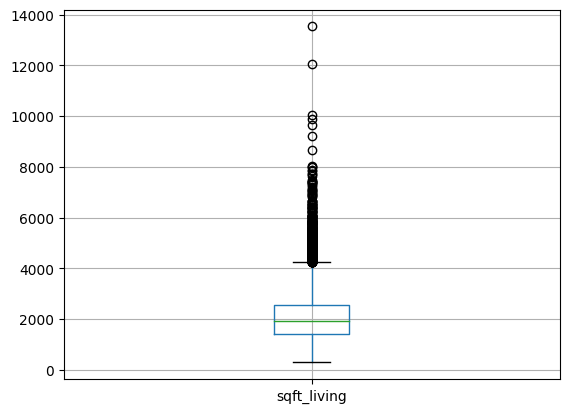

In [100]:
df.boxplot(column='sqft_living')
plt.show()

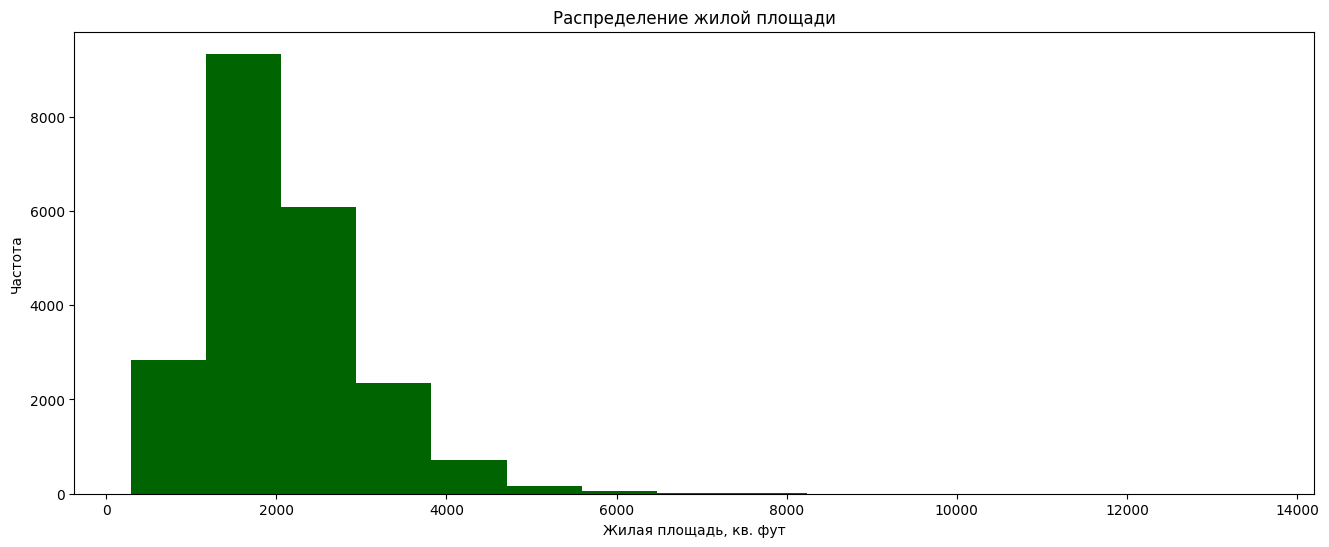

In [101]:
plt.figure(figsize=(16, 6))
plt.hist(df['sqft_living'], bins=15, color='darkgreen')

plt.xlabel('Жилая площадь, кв. фут')
plt.ylabel('Частота')
plt.title('Распределение жилой площади')

plt.show()

### Задача 1.4

Изучите распределение года постройки

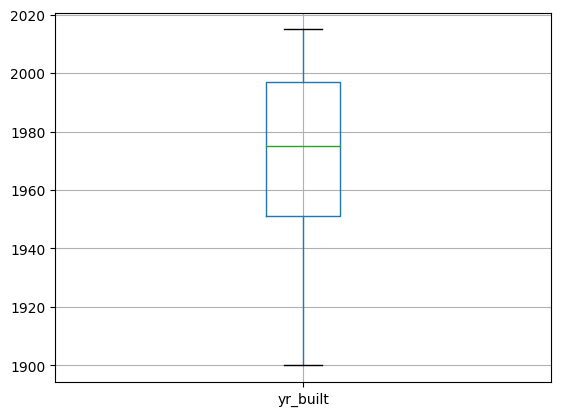

In [104]:
df.boxplot(column='yr_built')
plt.show()

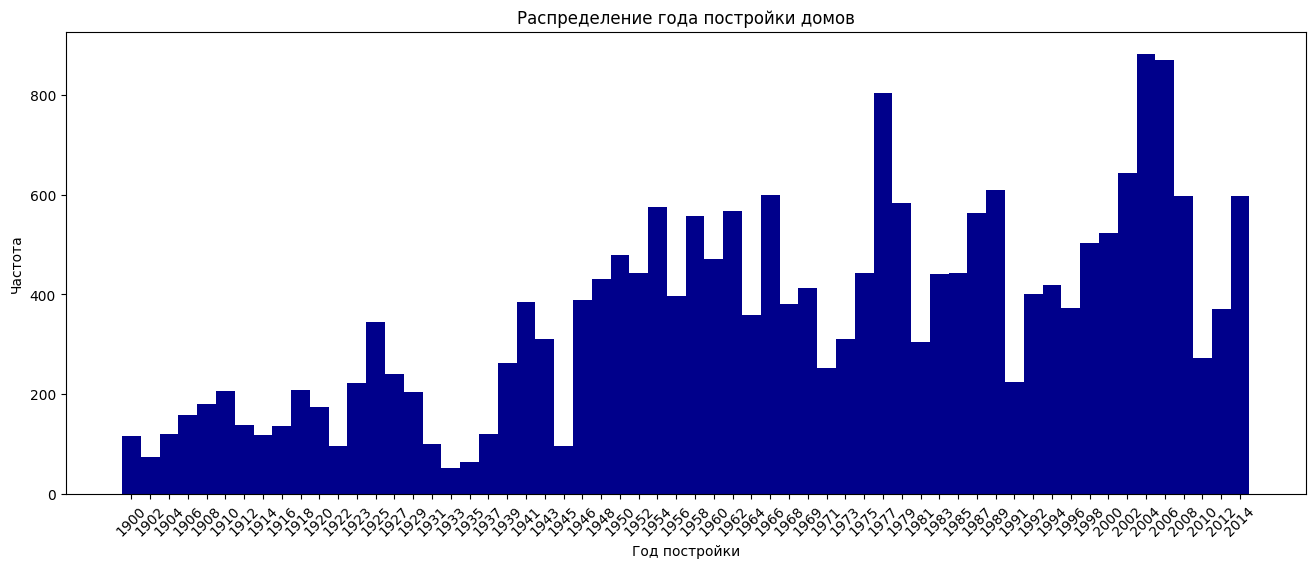

In [110]:
plt.figure(figsize=(16, 6))

n, bins, p = plt.hist(df['yr_built'], bins=60, color='darkblue')
# plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,}'.format(x)))
# print(n, bins, p)

bin_centers = (bins[:-1] + bins[1:]) / 2

plt.xticks(ticks=bin_centers, labels=[f"{int(x):}" for x in bin_centers], rotation=45)

plt.xlabel('Год постройки')
plt.ylabel('Частота')
plt.title('Распределение года постройки домов')

plt.show()


## Задача 2

### 2.1 Изучите распределение домов от наличия вида на набережную

Постройте график
Сделайте выводы

Не совсем понятно зачем тут рисовать график распределения, если при такой бинарности параметра (или есть вид на набережную или нет) проще проанализировать по количеству....

Но нарисуем по простому


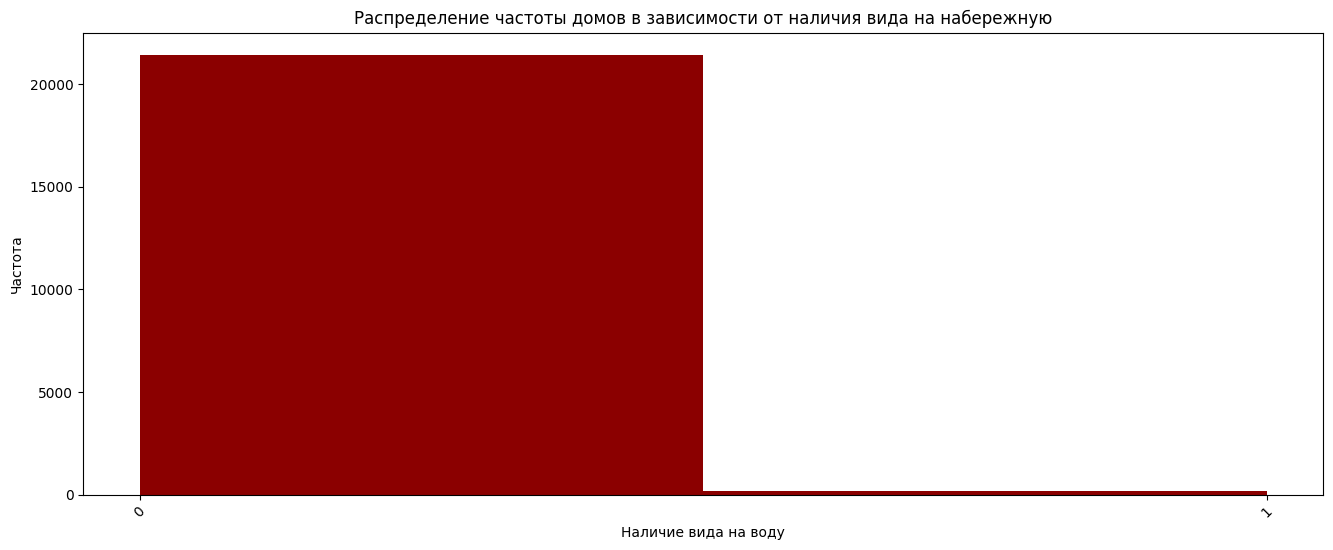

In [125]:
plt.figure(figsize=(16, 6))
n, bins, p = plt.hist(df['waterfront'], bins=2, color='darkred')
bin_centers = np.array([0,  1])
plt.xticks(ticks=bin_centers, labels=[f"{int(x):,}" for x in bin_centers], rotation=45)
plt.xlabel('Наличие вида на воду')
plt.ylabel('Частота')
plt.title('Распределение частоты домов в зависимости от наличия вида на набережную')
plt.show()

In [115]:
df['waterfront'].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

Можно сделать вывод, что с видом на набережную меньше одного процента домов и строить график распределения частоты домов по этому параметру безсмысленно

In [128]:
pd.crosstab(index=df['waterfront'], columns=df['view'])

view,0,1,2,3,4
waterfront,,,,,
0,19489,331,955,491,184
1,0,1,8,19,135



### 2.2 Изучите распределение этажей домов

скорее всего имеется ввиду распределение этажности домов

In [134]:
df['floors'].value_counts().sort_index()

floors
1.00    10680
1.50     1910
2.00     8241
2.50      161
3.00      613
3.50        8
Name: count, dtype: int64

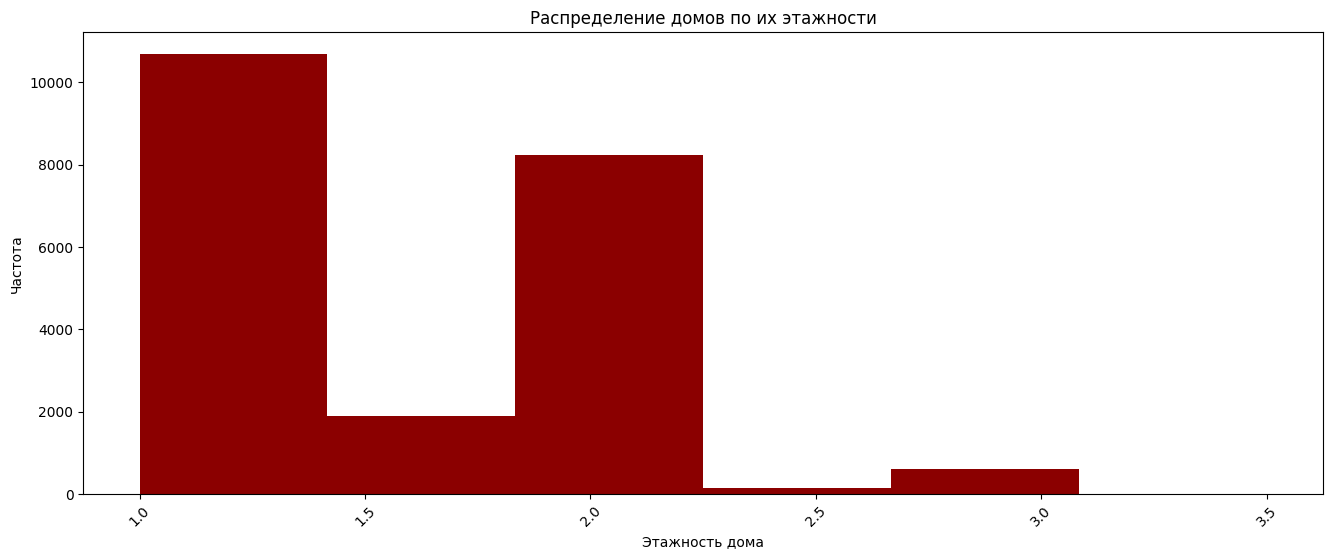

In [151]:
plt.figure(figsize=(16, 6))
n, bins, p = plt.hist(df['floors'], bins=6, color='darkred')
bin_centers = df['floors'].value_counts().index.sort_values()
plt.xticks(ticks=bin_centers, labels=[f"{x:}" for x in bin_centers], rotation=45)

plt.xlabel('Этажность дома')
plt.ylabel('Частота')
plt.title('Распределение домов по их этажности')
plt.show();

Можно сделать вывод, что подавляющее число домов одно или двухэтажные.

### 2.2 Изучите распределение состояния домов

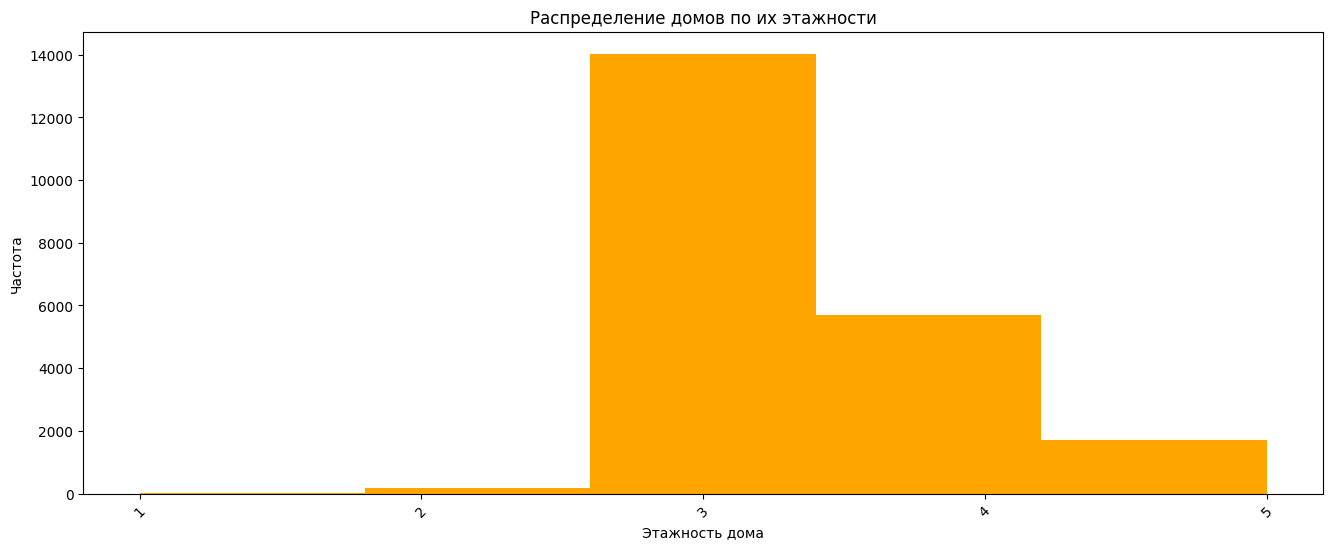

In [159]:
plt.figure(figsize=(16, 6))
n, bins, p = plt.hist(df['condition'], bins=5, color='orange')
bin_centers = df['condition'].value_counts().index.sort_values()
plt.xticks(ticks=bin_centers, labels=[f"{x:}" for x in bin_centers], rotation=45)

plt.xlabel('Этажность дома')
plt.ylabel('Частота')
plt.title('Распределение домов по их этажности')
plt.show();

## 3адача 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.


Проверим в какой степени стоимость дома будет зависеть от его площади.


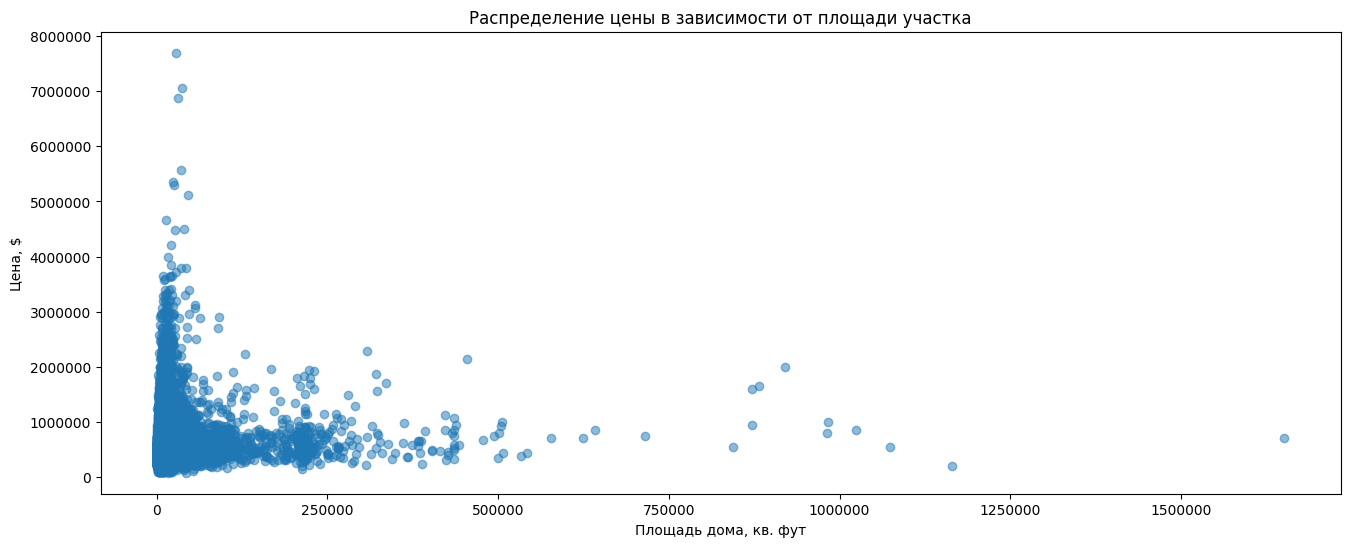

In [180]:
plt.figure(figsize=(16, 6))
plt.scatter(df['sqft_lot'], df['price'], alpha=0.5)
plt.ticklabel_format(style='plain', axis='both')  
plt.xlabel('Площадь дома, кв. фут')
plt.ylabel('Цена, $')
plt.title('Распределение цены в зависимости от площади участка')

plt.show()

Как видим прямой зависимости между площадью дома и ценой не прослеживается

Посмотрим как влияет состояние дома и вид

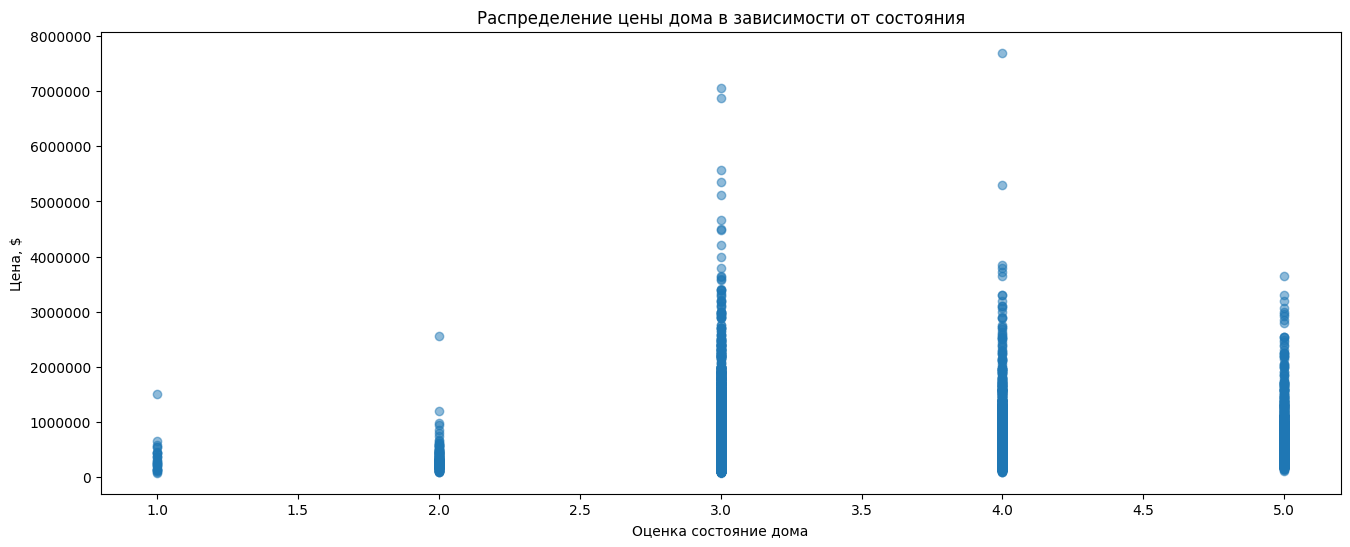

In [186]:
plt.figure(figsize=(16, 6))
plt.scatter(df['condition'], df['price'], alpha=0.5)
plt.ticklabel_format(style='plain', axis='both')  
plt.xlabel('Оценка состояние дома')
plt.ylabel('Цена, $')
plt.title('Распределение цены дома в зависимости от состояния')

plt.show()

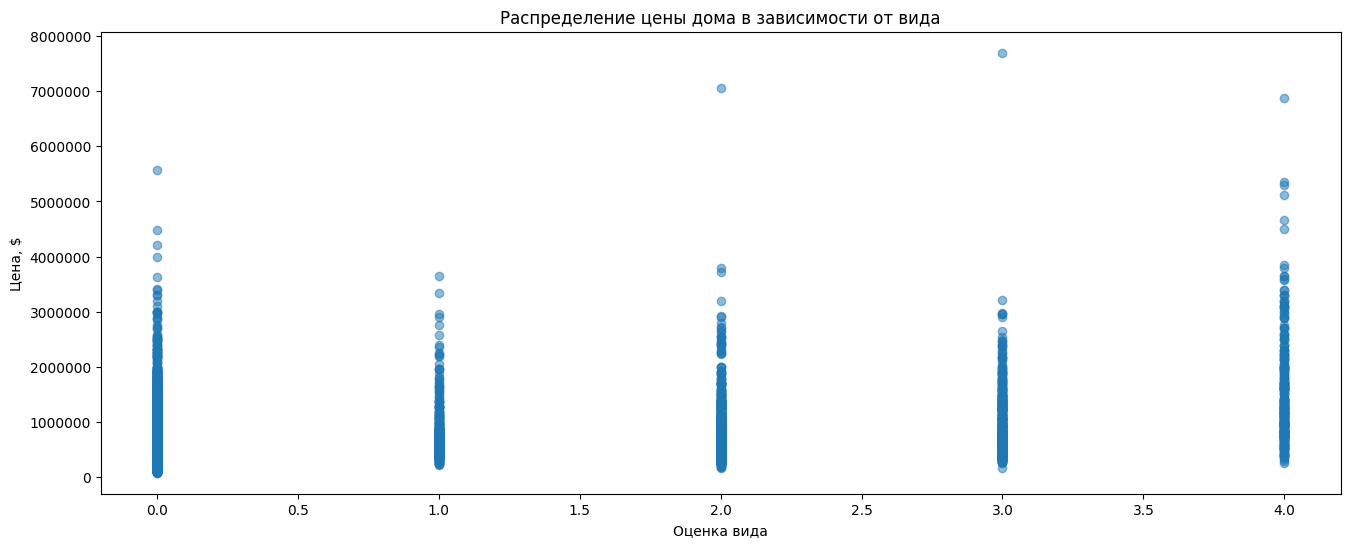

In [187]:
plt.figure(figsize=(16, 6))
plt.scatter(df['view'], df['price'], alpha=0.5)
plt.ticklabel_format(style='plain', axis='both')  
plt.xlabel('Оценка вида')
plt.ylabel('Цена, $')
plt.title('Распределение цены дома в зависимости от вида')

plt.show()

Можно сделать вывод, что на цену влияет незначительно, а вот состояние влияет в большей мере.

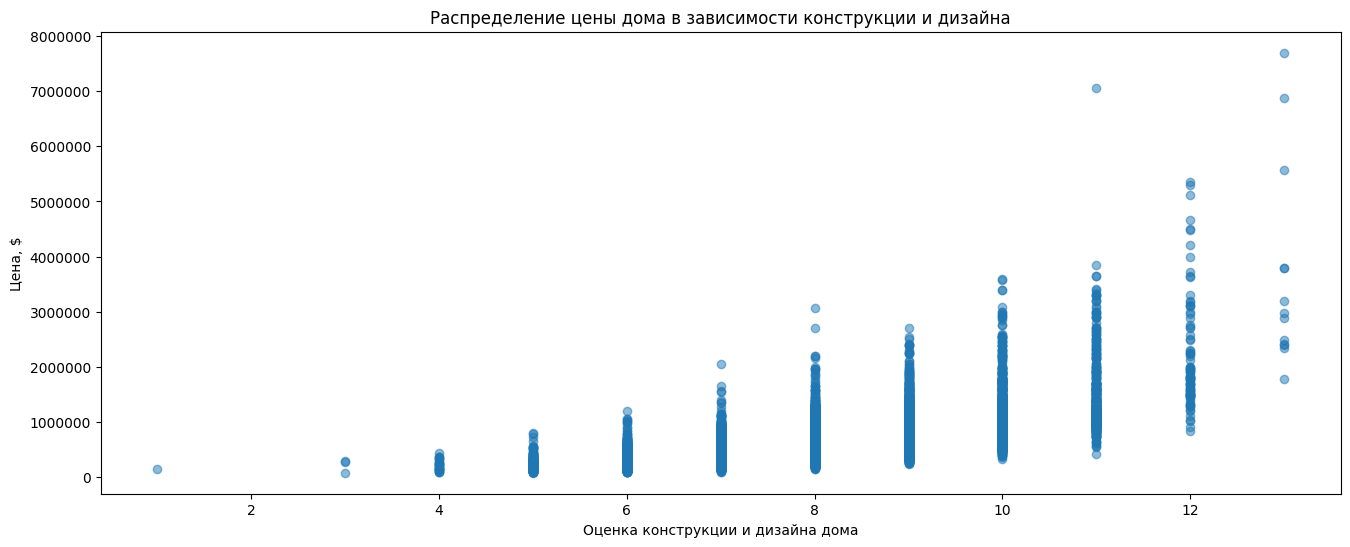

In [197]:
plt.figure(figsize=(16, 6))
plt.scatter(df['grade'], df['price'], alpha=0.5)
plt.ticklabel_format(style='plain', axis='both')  
plt.xlabel('Оценка конструкции и дизайна дома')
plt.ylabel('Цена, $')
plt.title('Распределение цены дома в зависимости конструкции и дизайна')

plt.show()

А вот от конструкции и дизайна (grain) рост стоимости прослеживается в гораздо большой степени

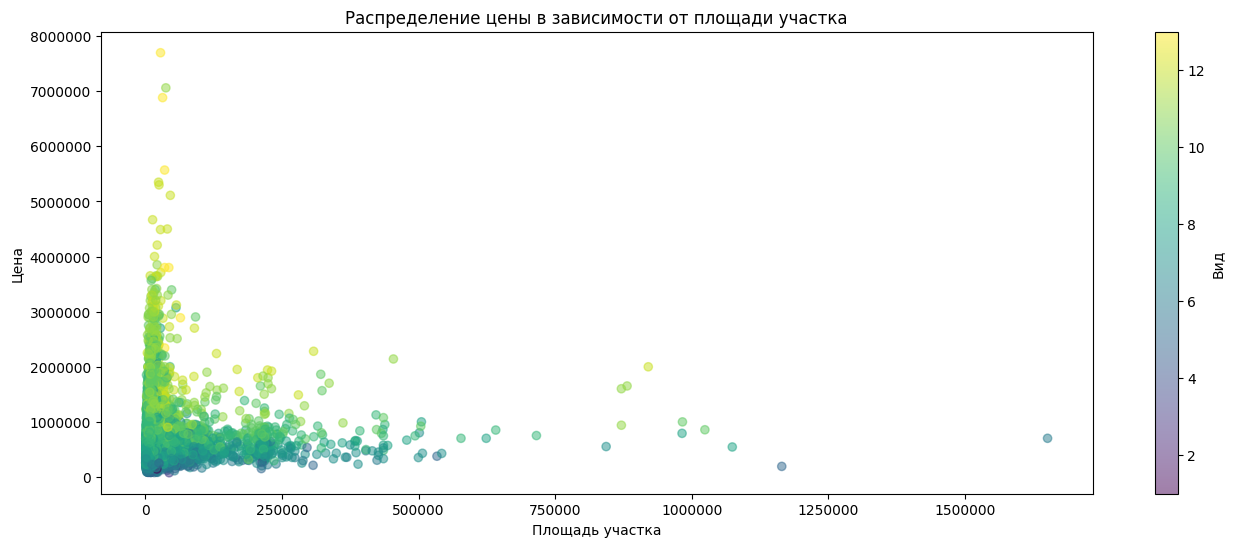

In [200]:
plt.figure(figsize=(16, 6))
plt.scatter( df['sqft_lot'], df['price'], c=df['grade'], cmap='viridis', alpha=0.5)
plt.ticklabel_format(style='plain', axis='both') 
plt.xlabel('Площадь участка')
plt.ylabel('Цена')
plt.title('Распределение цены в зависимости от площади участка')

# Добавление цветовой шкалы
colorbar = plt.colorbar()
colorbar.set_label('Вид')

plt.show()

In [203]:
df['price_sqft'] = df['price']/df['sqft_lot']
data = df[['price', 'view', 'grade', 'condition', 'sqft_lot', 'price_sqft', 'yr_built']]

print("Коэффициент корреляции Пирсона:")
print(data.corr(method='pearson'))

print("Коэффициент корреляции Спирмена:")
print(data.corr(method='spearman'))

Коэффициент корреляции Пирсона:
            price  view  grade  condition  sqft_lot  price_sqft  yr_built
price        1.00  0.40   0.67       0.04      0.09        0.31      0.05
view         0.40  1.00   0.25       0.05      0.07        0.08     -0.05
grade        0.67  0.25   1.00      -0.14      0.11        0.22      0.45
condition    0.04  0.05  -0.14       1.00     -0.01       -0.09     -0.36
sqft_lot     0.09  0.07   0.11      -0.01      1.00       -0.21      0.05
price_sqft   0.31  0.08   0.22      -0.09     -0.21        1.00      0.12
yr_built     0.05 -0.05   0.45      -0.36      0.05        0.12      1.00
Коэффициент корреляции Спирмена:
            price  view  grade  condition  sqft_lot  price_sqft  yr_built
price        1.00  0.29   0.66       0.02      0.07        0.51      0.10
view         0.29  1.00   0.22       0.05      0.12        0.11     -0.07
grade        0.66  0.22   1.00      -0.17      0.15        0.27      0.50
condition    0.02  0.05  -0.17       1.00      

По коэффициентам корреляции можно сделать примерно тот же вывод, что в наибольшей степени стоимость зависит от конструкции и дизайна дома

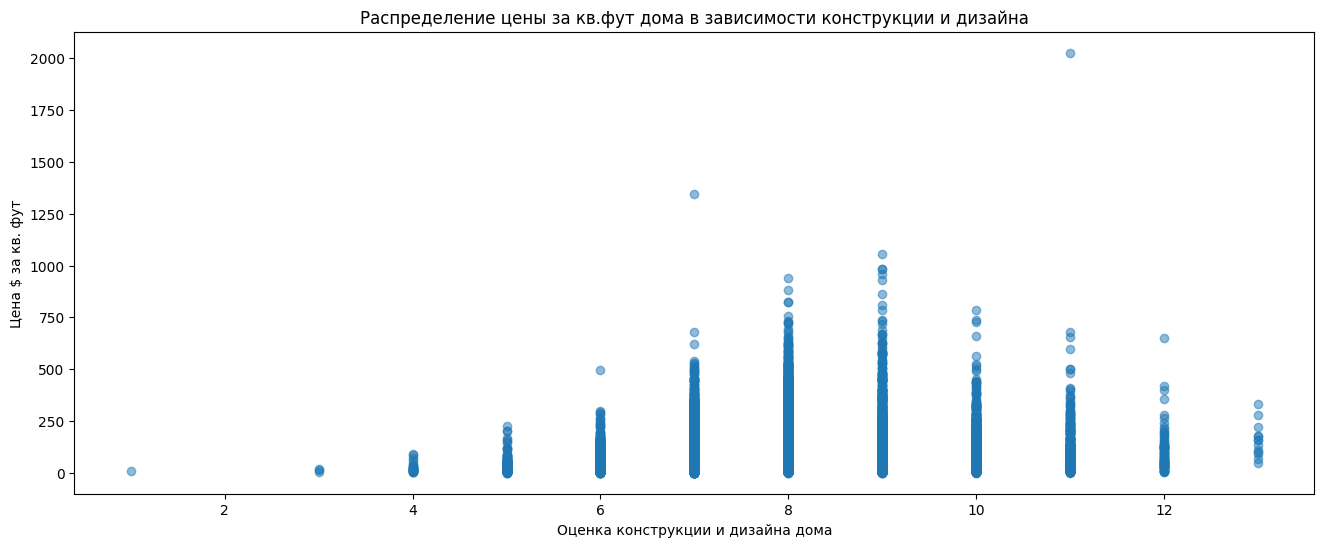

In [204]:
plt.figure(figsize=(16, 6))
plt.scatter(df['grade'], df['price_sqft'], alpha=0.5)
plt.ticklabel_format(style='plain', axis='both')  
plt.xlabel('Оценка конструкции и дизайна дома')
plt.ylabel('Цена $ за кв. фут')
plt.title('Распределение цены за кв.фут дома в зависимости конструкции и дизайна')

plt.show()

Интересное наблюдение, что цена за кв. фут после уровня оценки конструкции и дизайна свыше 9 не растёт...

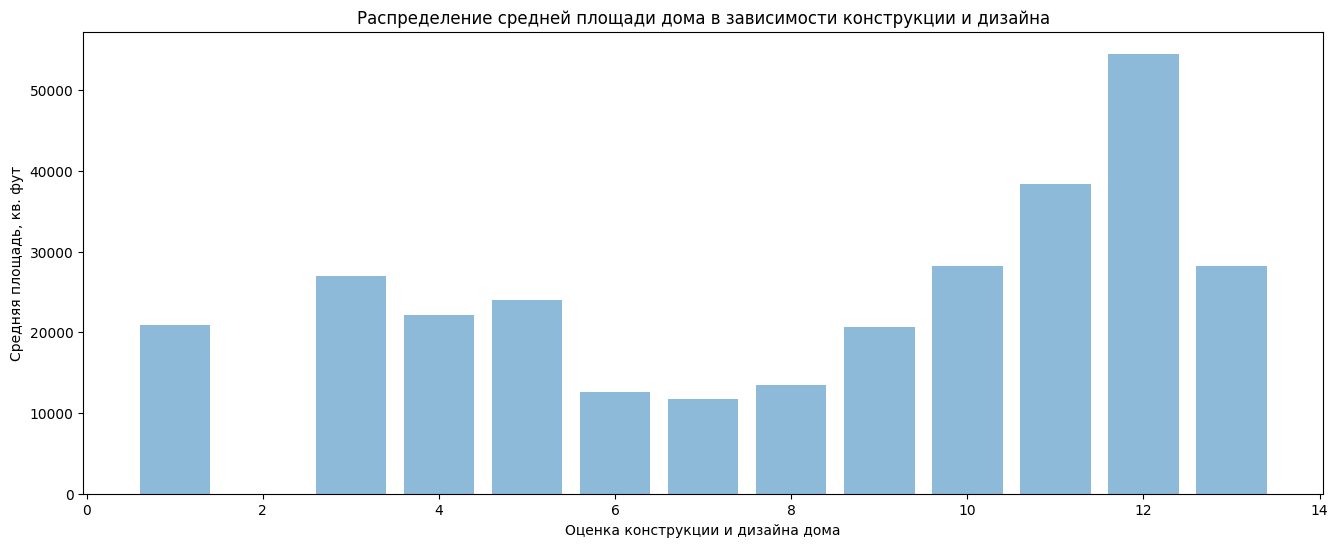

In [214]:
plt.figure(figsize=(16, 6))
plt.bar(df.groupby('grade')['sqft_lot'].mean().index, df.groupby('grade')['sqft_lot'].mean().values, alpha=0.5)
plt.ticklabel_format(style='plain', axis='both')  
plt.xlabel('Оценка конструкции и дизайна дома')
plt.ylabel('Средняя площадь, кв. фут')
plt.title('Распределение средней площади дома в зависимости конструкции и дизайна')

plt.show();

Получается, что с ростом уровня конструкции и дизайна начинает сильно расти общая площадь дома, что не дает расти средней цене за кв. фут

In [206]:
df.groupby('grade')['sqft_lot'].mean()

grade
1    20,875.00
3    26,953.00
4    22,101.48
5    24,019.91
6    12,646.95
7    11,766.44
8    13,510.19
9    20,638.52
10   28,191.06
11   38,372.79
12   54,521.31
13   28,204.77
Name: sqft_lot, dtype: float64

In [209]:
df.groupby('grade')['price'].count()

grade
1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
Name: price, dtype: int64